In [ ]:
%matplotlib inline  
import matplotlib.pyplot as plt  
import pandas as pd  
import numpy as np  
import config
from myfunc import timer
from myfunc import DirMan
import matplotlib
import geopandas as gpd
from pylab import rcParams
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs

# configuration
# resolution = "0p1"
resolution = "500"
region = [-180,180,-60,90]
data_path = f'/tera04/zhwei/xionghui/bedrock/run/{resolution}/'
post_data_path = '/tera04/zhwei/xionghui/bedrock/'
shp_path = '/tera04/zhwei/xionghui/bedrock/Shp/'
fig_path = f'/home/xuxh22/stu01/Bedrock/fig/{resolution}/'
path = '/home/xuxh22/stu01/Bedrock/'
if resolution == "0p1":
    size = 0.1
elif resolution == "500":
    size = 0.0005

font = {'family': 'Times New Roman'}
matplotlib.rc('font', **font)

params = {'backend': 'ps',
          'axes.labelsize': 25,
          'grid.linewidth': 0.2,
          'font.size': 25,
          'legend.fontsize': 18,
          'legend.frameon': False,
          'xtick.labelsize': 30,
          'xtick.direction': 'out',
          'ytick.labelsize': 30,
          'ytick.direction': 'out',
          'legend.handlelength': 1,
          'legend.handleheight': 1,
          'savefig.bbox': 'tight',
          'axes.unicode_minus': False,
          "mathtext.default":"regular",
          'text.usetex': False}
rcParams.update(params)

df = pd.read_csv(f'{data_path}csv/Global.csv')
shp = gpd.read_file(shp_path+'World_CN/ne_10m_admin_0_countries_chn.shp')

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df1= df.copy()
df1= df1[df1['Koppen'] > 0]
df1= df1[df1['Koppen'] < 29]
df1 = df1[df1['IGBP'] < 10]
df1 = df1[df1['IGBP'] > 0]

df1['Koppen_Together'] = df1['Koppen'].replace(to_replace=[5, 7, 9, 10, 12, 13, 15, 16, 18, 19, 20, 22, 23, 24, 26, 27, 28], value=[4, 6, 8, 8, 11, 11, 14, 14, 17, 17, 17, 21, 21, 21, 25, 25, 25])

KoppenList = ['Tropical Rainforest (Af)','Tropical Monsoon (Am)','Tropical Savanna (Aw)',
              'Desert (BWh)','Arid (BWk)',
              'Semi Arid (BSh)','Semi Arid (BSk)',
              'Mediterranean (Csa)','Mediterranean (Csb)','Mediterranean (Csc)',
              'Humid Subtropical (Cwa)','Oceanic (Cwb)','Ocanic (Cwc)',
              'Humid Subtropical (Cfa)','Oceanic (Cfb)','Oceanic (Cfc)',
              'Humid Continental (Dsa)','Humid Continental (Dsb)','Subarctic (Dsc)','Subarctic (Dsd)',
              'Humid Continental (Dwa)','Humid Continental (Dwb)','Subarctic (Dwc)','Subarctic (Dwd)',
              'Humid Continental (Dfa)','Humid Continental (Dfb)','Subarctic (Dfc)','Subarctic (Dfd)',
              'Tundra (ET)', 'Tundra (EF)']
IGBPList = ['Evergreen Needleleaf Forests', 'Evergreen Broadleaf Forests', 
            'Deciduous Needleleaf Forests', 'Deciduous Broadleaf Forests', 
            'Mixed Forests', 
            'Closed Shrublands', 'Open Shrublands', 
            'Woody Savannas', 'Savannas', 
            'Grasslands', 'Permanent Wetlands', 'Croplands', 
            'Urban and Built-up Lands', 'Cropland/Natural Vegetation Mosaics', 
            'Permanent Snow and Ice', 'Barren', 'Water Bodies']

igbp_dict = {i: IGBPList[i-1] for i in range(1, 18)}
koppen_dict = {i: KoppenList[i-1] for i in range(1, 31)}  

df1['Koppen_Name'] = df1['Koppen_Together'].map(koppen_dict)
df1['IGBP_Name'] = df1['IGBP'].map(igbp_dict)


In [4]:
stats1 = df1.groupby(['IGBP']).agg(  
    sbedrock_mean=('Sbedrock', 'mean'),    
    area_total=('Area', 'sum'),          
).reset_index()

df_area1 = pd.pivot_table(
    df1,
    index=['IGBP'],
    columns='Dbedrock_Frequency',
    values='Area',
    aggfunc='sum',
    fill_value=0
).reset_index()

df_area1.columns = ['IGBP', 'Pattern1_area', 'Pattern2_area']
stats1 = stats1.merge(df_area1, on=['IGBP'], how='left')

stats1['area_total'] = stats1['area_total']/1e6
stats1['Pattern1_area'] = stats1['Pattern1_area'] / 1e6
stats1['Pattern2_area'] = stats1['Pattern2_area'] / 1e6
stats_sorted1 = stats1.sort_values(by='area_total', ascending=False)
stats_sorted1

,IGBP,sbedrock_mean,area_total,Pattern1_area,Pattern2_area
8,9,128.851315,6.492885e+06,3.562660e+06,2.930225e+06
7,8,91.278231,4.875100e+06,1.692282e+06,3.182818e+06
1,2,183.792336,4.844507e+06,2.095295e+06,2.749212e+06
6,7,30.829112,2.760743e+06,7.206580e+05,2.040085e+06
4,5,63.187300,2.399401e+06,4.958409e+05,1.903560e+06
3,4,111.744159,1.652132e+06,5.653778e+05,1.086754e+06
0,1,60.666637,1.117136e+06,4.095987e+05,7.075372e+05
2,3,27.762997,2.202681e+05,1.496142e+04,2.053067e+05
5,6,74.916807,6.817432e+04,2.612684e+04,4.204748e+04


In [5]:
stats2 = df1.groupby(['Koppen_Together']).agg(
    sbedrock_mean=('Sbedrock', 'mean'),    
    area_total=('Area', 'sum'),          
).reset_index()

df_area2 = pd.pivot_table(
    df1,
    index=['Koppen_Together'],
    columns='Dbedrock_Frequency',
    values='Area',
    aggfunc='sum',
    fill_value=0
).reset_index()

df_area2.columns = ['Koppen_Together', 'Pattern1_area', 'Pattern2_area']
stats2 = stats2.merge(df_area2, on=['Koppen_Together'], how='left')

stats2['area_total'] = stats2['area_total']/1e6
stats2['Pattern1_area'] = stats2['Pattern1_area'] / 1e6
stats2['Pattern2_area'] = stats2['Pattern2_area'] / 1e6
stats_sorted2 = stats2.sort_values(by='area_total', ascending=False)
stats_sorted2

,Koppen_Together,sbedrock_mean,area_total,Pattern1_area,Pattern2_area
10,25,32.875172,6.195557e+06,1.144606e+06,5.050950e+06
2,3,237.460342,5.159787e+06,4.228423e+06,9.313645e+05
7,14,76.317332,2.623836e+06,2.557730e+05,2.368063e+06
6,11,179.960886,2.306525e+06,1.326896e+06,9.796287e+05
1,2,237.456644,1.961770e+06,1.100325e+06,8.614456e+05
0,1,125.753432,1.646400e+06,2.060910e+05,1.440309e+06
9,21,18.043035,1.555588e+06,2.210757e+05,1.334512e+06
3,4,32.330991,1.009825e+06,1.193633e+05,8.904615e+05
4,6,78.870705,8.105010e+05,2.716187e+05,5.388822e+05
5,8,178.605182,6.140795e+05,4.134960e+05,2.005835e+05


In [6]:
# stats_sorted12 = stats_sorted1[stats_sorted1['area_total']>4e5]
stats_sorted12 = stats_sorted1.copy()
stats_sorted12['Pattern1'] = (stats_sorted12['Pattern1_area']/stats_sorted12['area_total']*100).round().astype(int)
stats_sorted12['Pattern2'] = (stats_sorted12['Pattern2_area']/stats_sorted12['area_total']*100).round().astype(int)
stats_sorted12['sbedrock_mean'] = stats_sorted12['sbedrock_mean'].round().astype(int)
stats_sorted12['area_total'] = stats_sorted12['area_total'].round().astype(int)
stats_sorted12['Pattern1_area'] = stats_sorted12['Pattern1_area'].round().astype(int)
stats_sorted12['Pattern2_area'] = stats_sorted12['Pattern2_area'].round().astype(int)

stats_sorted12

,IGBP,sbedrock_mean,area_total,Pattern1_area,Pattern2_area,Pattern1,Pattern2
8,9,129,6492885,3562660,2930225,55,45
7,8,91,4875100,1692282,3182818,35,65
1,2,184,4844507,2095295,2749212,43,57
6,7,31,2760743,720658,2040085,26,74
4,5,63,2399401,495841,1903560,21,79
3,4,112,1652132,565378,1086754,34,66
0,1,61,1117136,409599,707537,37,63
2,3,28,220268,14961,205307,7,93
5,6,75,68174,26127,42047,38,62


In [7]:
# stats_sorted22 = stats_sorted2[stats_sorted2['area_total']>4e5]
stats_sorted22 = stats_sorted2.copy()

stats_sorted22['Pattern1'] = (stats_sorted22['Pattern1_area']/stats_sorted22['area_total']*100).round().astype(int)
stats_sorted22['Pattern2'] = (stats_sorted22['Pattern2_area']/stats_sorted22['area_total']*100).round().astype(int)
stats_sorted22['sbedrock_mean'] = stats_sorted22['sbedrock_mean'].round().astype(int)
stats_sorted22['area_total'] = stats_sorted22['area_total'].round().astype(int)
stats_sorted22['Pattern1_area'] = stats_sorted22['Pattern1_area'].round().astype(int)
stats_sorted22['Pattern2_area'] = stats_sorted22['Pattern2_area'].round().astype(int)

stats_sorted22

,Koppen_Together,sbedrock_mean,area_total,Pattern1_area,Pattern2_area,Pattern1,Pattern2
10,25,33,6195557,1144606,5050950,18,82
2,3,237,5159787,4228423,931365,82,18
7,14,76,2623836,255773,2368063,10,90
6,11,180,2306525,1326896,979629,58,42
1,2,237,1961770,1100325,861446,56,44
0,1,126,1646400,206091,1440309,13,87
9,21,18,1555588,221076,1334512,14,86
3,4,32,1009825,119363,890462,12,88
4,6,79,810501,271619,538882,34,66
5,8,179,614079,413496,200583,67,33


/tmp/ipykernel_883352/1158322459.py:21: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(left=0, right=1,
/tmp/ipykernel_883352/1158322459.py:51: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


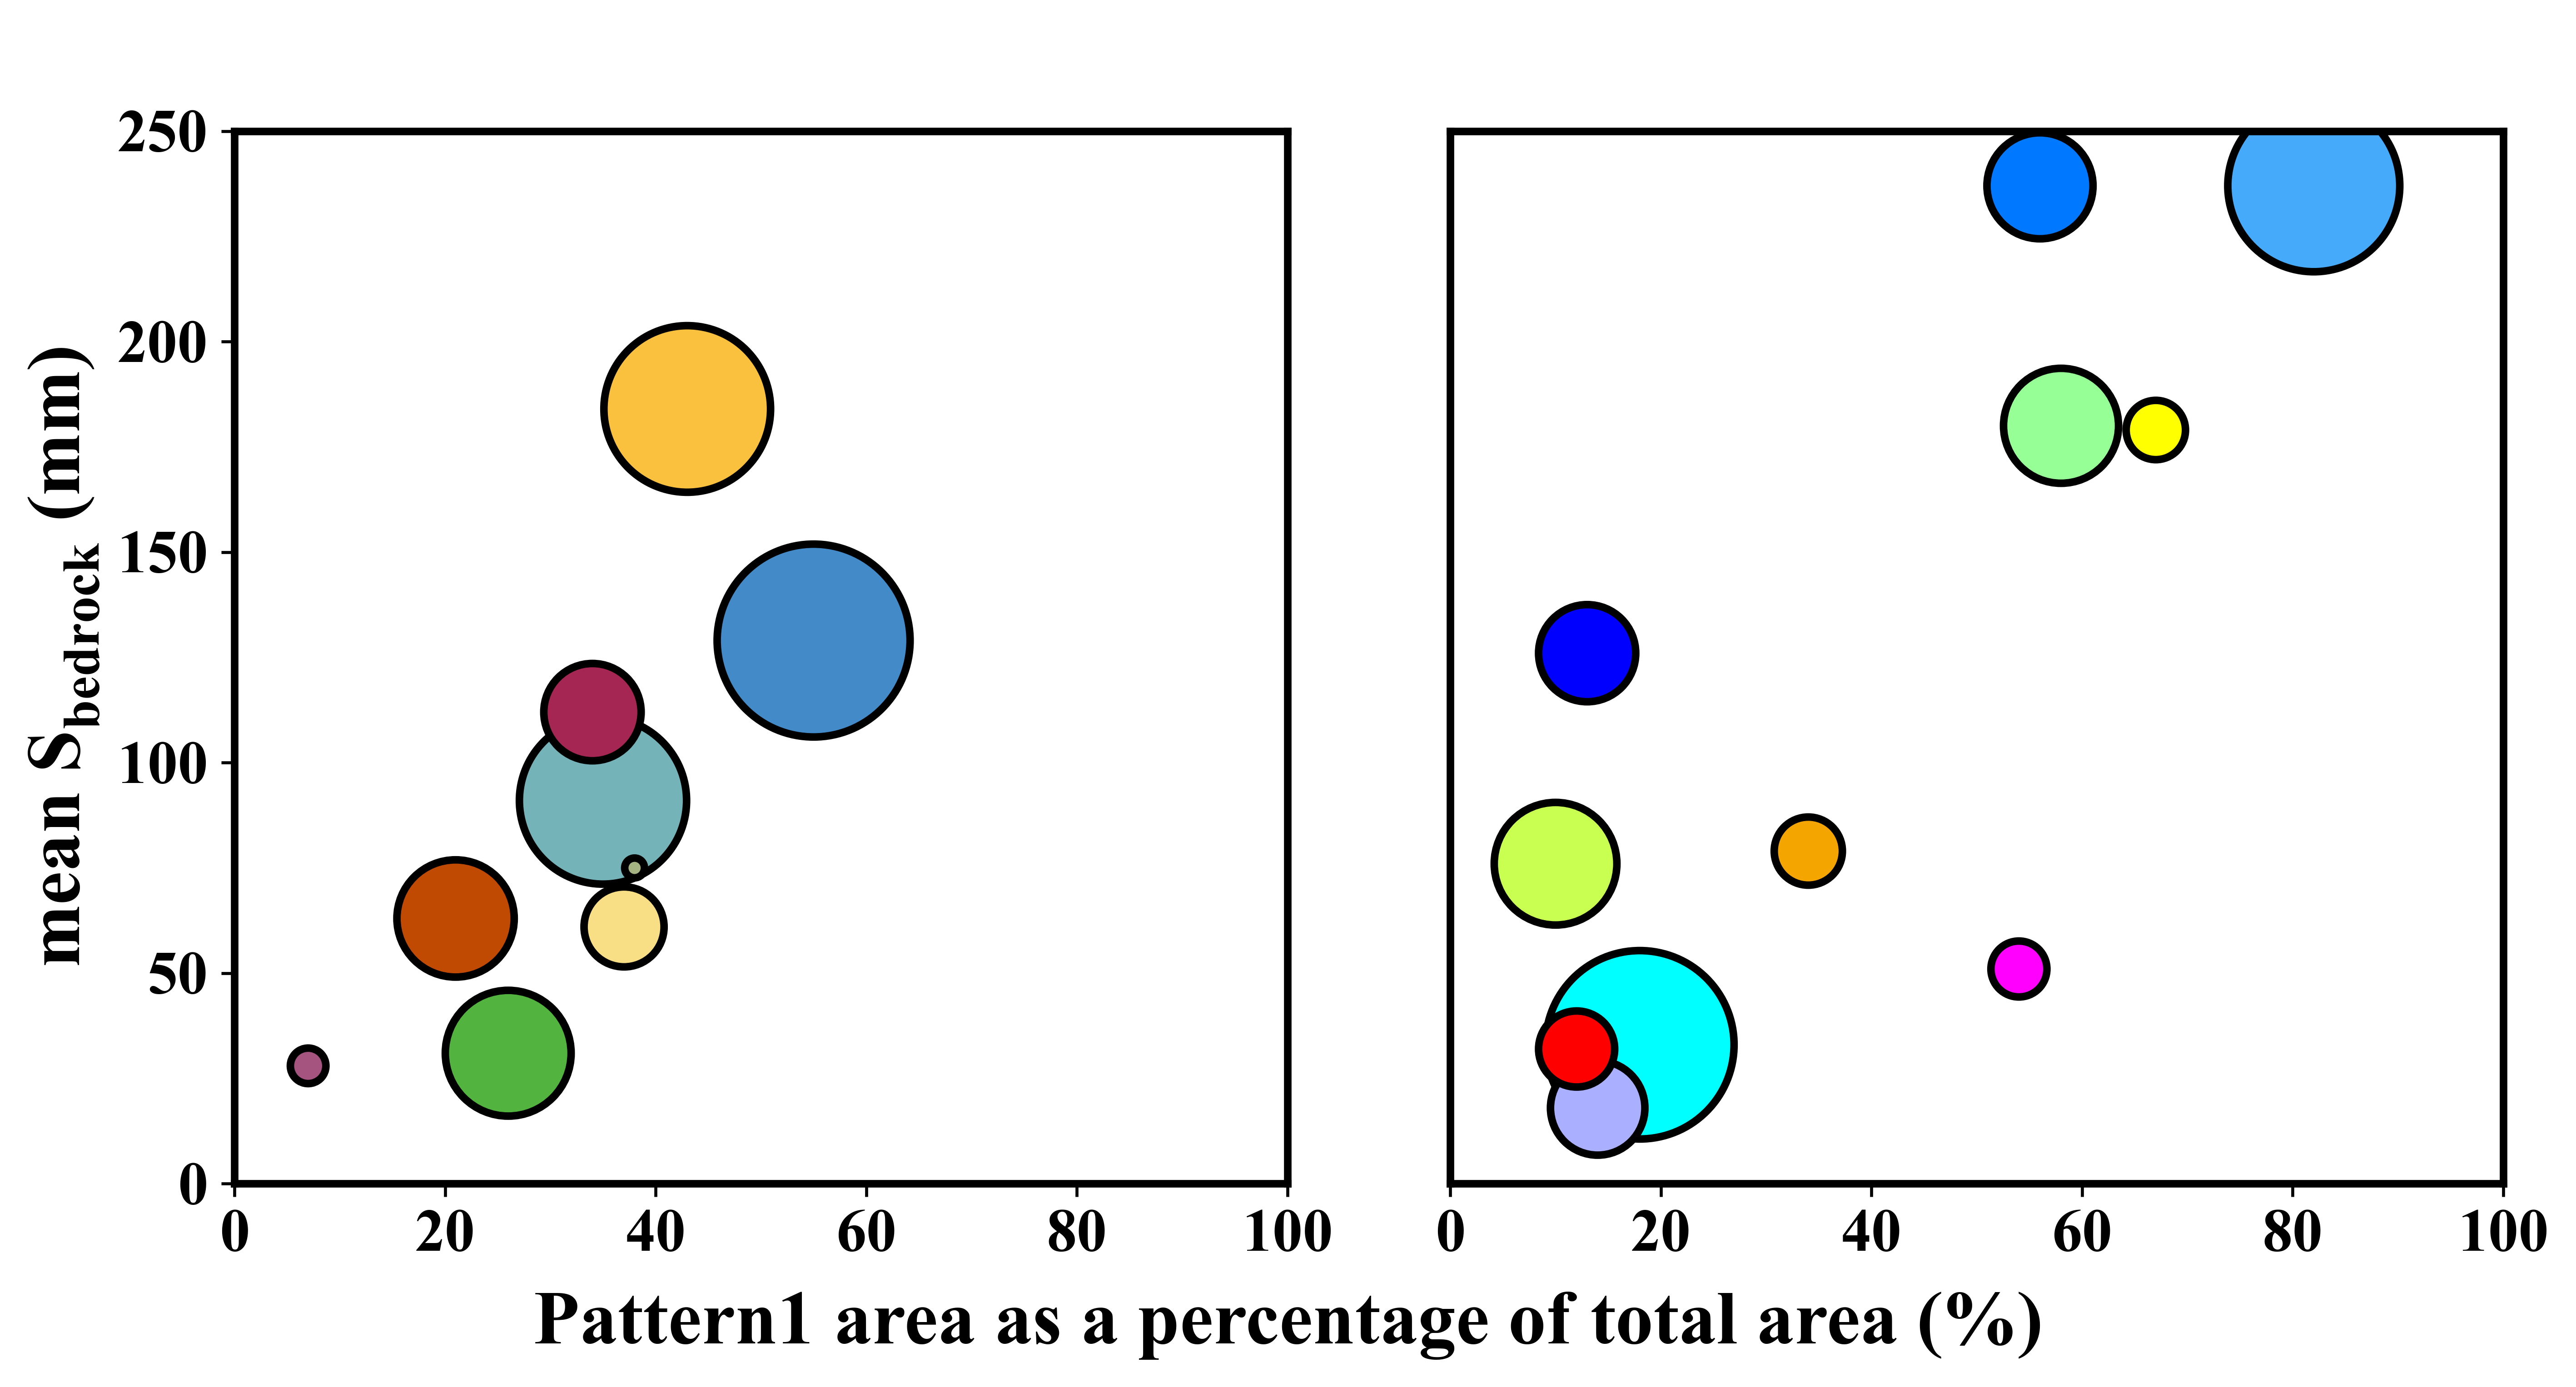

In [22]:
size1=45
def scatter_draw(ax,rgb_list,x,y,size=45):
    color = rgb_list[:len(x)] 
    scatter = ax.scatter(x, y, s=size, linewidths=2,
                        edgecolors="k", color=color)
    for spine in ax.spines.values():
        spine.set_edgecolor('black')  
        spine.set_linewidth(2)  

    ax.set_ylim(0, 100)  
    ax.set_xlim(0, 100) 
    # ax.xaxis.set_ticks_position('top') 
    # ax.yaxis.set_ticks_position('right')  
    # ax.xaxis.tick_right()  
    # ax.xaxis.set_label_position("right")  
    ax.set_xticks(np.arange(0,120,20))
    ax.set_xticklabels(np.arange(0,120,20), fontsize=16, fontweight='bold')
    ax.set_aspect('equal', adjustable='box')

fig, ax = plt.subplots(figsize=(10, 6), dpi=600, constrained_layout=True) 
fig.subplots_adjust(left=0, right=1, 
                bottom=0, top=1,  wspace=0) 
gs = GridSpec(1, 2, figure=fig)

ax.set_axis_off()
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

# rgb_list = ['#f8de85', '#FAC13E','#a5537f','#a52653',
#             '#c04a02','#A4B381','#52B33F','#74B3B8',
#             '#428ac8','#7846A8']
rgb_list = ['#428ac8', '#74B3B8','#FAC13E','#52B33F','#c04a02','#a52653','#f8de85','#a5537f',
            '#A4B381',]
scatter_draw(ax1,rgb_list,stats_sorted12['Pattern1'],stats_sorted12['sbedrock_mean']/2.5,stats_sorted12['area_total']/2500)
ax1.set_ylabel('mean $S_{{bedrock}}$ (mm)', fontsize=20, fontweight='bold')
ax1.set_yticks(np.arange(0,120,20))
ax1.set_yticklabels(np.arange(0,300,50), fontsize=16, fontweight='bold')

# rgb_list = ['#ffffff','#0000FE','#0077FF','#46A9FA','#FE0000',
#             '#FE9695','#F5A301','#FFDB63','#FDFD45','#C6C700',
#             '#96FF96','#63C764','#329633','#C6FF4E','#66FF33',
#             '#33C701','#FF00FE','#C600C7','#963295','#966495',
#             '#ABB1FF','#5A77DB','#4C51B5','#320087','#18DCDC',
#             '#38C7FF','#007E7D','#00455E','#B2B2B2','#686868']
rgb_list = ['#00FFFF','#46AAFA','#C8FF50','#96FF96','#0078FF','#0000FF','#AAAFFF','#FF0000','#F5A500','#FFFF00','#FF00FF',]
scatter_draw(ax2,rgb_list,stats_sorted22['Pattern1'],stats_sorted22['sbedrock_mean']/2.5,stats_sorted22['area_total']/2500)
ax2.set_yticks([])

fig.suptitle('Pattern1 area as a percentage of total area (%)', fontsize=20, fontweight='bold', y=0.06)

plt.tight_layout() 
plt.show()